# Bosques Aleatorios (RF) y Redes Neuronales

En este tutorial estudiaremos cómo implementar un clasificador supervisado a partir de un Bosque Aleatorio usando la librería `sklearn`. Adicionalmente, aprenderemos a acceder a la información asociada a cada árbol de decisión a partir de las clases y métodos de esta librería. Posteriormente, implementaremos y entrenaremos una red neuronal simple desde cero, y luego emplearemos la librería `PyTorch` para hacer un modelo semejante sin la necesidad de implementar la propagación y retropropagación de forma manual.

## Bosques Aleatorios (RF)

En el tutorial pasado estudiamos cómo implementar una Máquina de Soporte Vectorial (SVM), la cuál, naturalmente puede ser bastante útil para problemas de clasificación binarios, ya que consiste en encontrar una superficie que separe el espacio asociado a dos conjuntos de datos de la mejor forma posible. Se podría resolver un problema de clasificación multiclase entrenando un SVM por cada clase. Sin embargo, existen clasificadores cuyo algoritmo es naturalmente generalizable a una clasificación multiclase.

Un ejemplo de este tipo de algoritmos son los *Bosques Aleatorios*. Estos son un conjunto de *Árboles de Decisión* entranados de forma simultánea sobre distintas particiones del conjunto de entrenamiento. Teniendo esto en cuenta, primero entendamos el fundamento básico de un Árbol de Decisión, el cual se encuentra ilustrado a continuación:

<div>
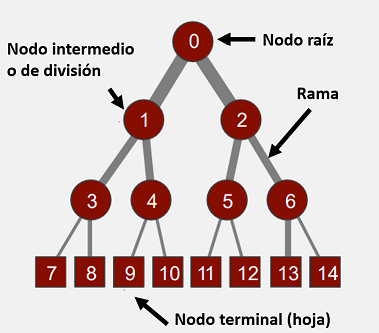
</div>

El nodo raíz representa la entrada a nuestro modelo de clasificación, en el cual todos los datos se encuentran agrupados. En cada nodo, los datos se dividirán según una decisión con respecto a las entradas del vector de representación de cada dato, dando origen a dos ramas nuevas. Los datos seguirán distintas ramas hasta alcanzar los nodos terminales, los cuales también se conocen como *hojas*. A cada hoja se le asigna una clase (la clase más representada entre los datos de entrenamiento que llegaron a dicha hoja). Durante inferencia, el vector de representación de un dato sigue el árbol de decisión desde el nodo raíz hasta alguna hoja, y la etiqueta asignada corresponde a la clase asociada a la hoja en la que terminó.

En este punto puede estarse preguntando, ¿cómo se obtienen las reglas de decisión que separan los datos que llegan a cada nodo? Sin ahondar en la matemática que se encuentra por detrás, se busca hacer divisiones en el espacio de representación que permitan obtener las distribuciones más "puras", es decir que separe distintas clases, procurando que los puntos de cada clase permanezcan juntos. La siguiente imagen representa este concepto:


<div>
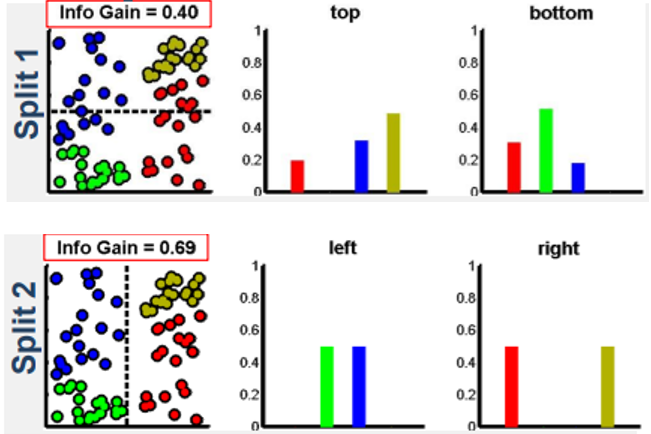
</div>

Note que para este ejemplo aunque la primer opción de "split" logra separar las clases verdes de las amarillas, la separación crea subconjuntos de las otras clases involucradas, lo que no es deseable. Por otro lado, la segunda opción de "split" separa las clases azul y verde de las clases amarilla y roja. A pesar de que no se está segregando clases individuales, se están discriminando grupos de clases, y se están preservando los conjuntos de cada clase, posibilitando que en otro nodo haya una discriminación más específica entre menos clases y preservando la integridad de cada conjunto de mejor forma. 

Una forma sencilla de *decisión* es umbralizar un componente del vector de características de cada dato, como en el ejemplo anterior. Sin embargo, se puede construir todo tipo de superficies de separación en el espacio de representación.

Los bosques aleatorios buscan ponderar las decisiones tomadas por múltiples árboles para evitar el *over-fitting*. Cada árbol del bosque es entrenado con un subconjunto del *set* de entrenamiento global para evitar que todos los árboles acaben aprendiendo lo mismo.

En este caso, emplearemos un conjunto de datos ya incluido en la librería `sklearn` para estudiar cómo funciona un RF. Este conjunto de datos está construido para estudiar la tarea de clasificar flores a partir de algunas características morfológicas. A continuación, se carga este conjunto de datos, se muestran las dimensiones de su matriz de propiedades y vector de etiquetas asociados, y se divide en un conjunto de entrenamiento y prueba:

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
print("\nLas clases consideradas en este dataset son:")
print(iris.target_names)
print("\nLos features considerados en este dataset son:")
print(iris.feature_names)

X = iris.data
print("\nLas dimensiones de la matriz X son: ", X.shape)

Y = iris.target
print("El tamaño del vector Y es: ", Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=111)

print("\nEl conjunto de entrenamiento tiene " + str(X_train.shape[0]) + " datos")
print("El conjunto de prueba tiene " + str(X_test.shape[0]) + " datos.")

La librería `sklearn.ensemble` nos permite crear un modelo de clasificación a partir de un Bosque Aleatorio, entrenarlo, y después generar inferencias sobre un conjunto de prueba en pocas líneas:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Se crea instancia de un Bosque aleatorio. El parámetro n_estimators indica la cantidad de árboles del bosque
rf_1 = RandomForestClassifier(n_estimators = 10, random_state=42)
# Se entrena el modelo en el conjunto de entrenamiento
rf_1.fit(X_train, Y_train)
# Se obtienen las etiquetas predichas por el modelo sobre el conjunto de prueba
Y_pred_1 = rf_1.predict(X_test)


## **Ejercicio 1**: 
Empleando las funciones de la librería `sklearn.metrics` encuentre la precisión, cobertura y F-medida media entre clases para las predicciones de este clasificador con respecto a las etiquetas. Pista: Remítase al primer tutorial del curso y revise cual es el valor que debe tomar el parametro `average`.

In [ ]:
# Desarrolle su implementación en este recuadro
prec_prom = '' #variable que tendrá la precisión promedio
rec_prom = ''#variable que tendrá la cobertura promedio
fs_prom = ''#variable que tendrá las f-medida promedio

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
import numpy as np
print(f'Precisión: {prec_prom}')
print(f'Cobertura: {rec_prom}')
print(f'F-medida: {fs_prom}')
assert np.isclose(prec_prom,0.9347,0.1),f'su valor de precisión debería ser cercano a {0.9347} y es {prec_prom}'
assert np.isclose(rec_prom,0.9369,0.1),f'su valor de cobertura debería ser cercano a {0.9369} y es {rec_prom}'
assert np.isclose(fs_prom,0.9352,0.1),f'su valor de f-medida debería ser cercano a {0.9352} y es {fs_prom}'

Una funcionalidad simple de esta implementación de `sklearn` es que a través del atributo `feature_importances_` se puede identificar cuales son los parámetros del vector de representación más relevantes para segregar las clases, esta importancia es calculada como la reducción total (normalizada) del criterio que aporta esa característica. Entre más alto sea este valor, más importante será el atributo. Esto puede ser útil para reducir la dimensionalidad y el gasto computacional cuando se trabaja con datos de descriptores muy grandes. A continuación se muestra cómo construir un diccionario que mapee los nombres de las características a sus importancias según el modelo entrenado previamente:


In [ ]:
importance_dict = dict(zip(iris.feature_names, rf_1.feature_importances_))
print("La importancia asociada por el clasificador a cada feature es:")
print(importance_dict)

Si bien anteriormente se mostró una implementación sencilla, los modelos de RF tienen muchos parámetros ajustables, lo cual en algunos contextos puede considerarse como una desventaja. A continuación, se muestra una segunda implementación que asigna varios de estos parámetros explicitamente. Entre estos destaca `criterion`, que es la función empleada para identificar que tan bueno es un umbral de separación, y `max_depth`, que indica la mayor cantidad posible de nodos consecutivos antes de alcanzar una hoja.

In [ ]:
rf_2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini",
                             max_depth=None, max_features='auto', max_leaf_nodes=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                             oob_score=False, random_state=21, verbose=0, warm_start=False)

rf_2.fit(X_train, Y_train)
Y_pred_2 = rf_2.predict(X_test)

Como pudieron darse cuenta, el atributo `estimators_` nos permite acceder a una lista con todos los árboles que conforman el bosque. Por su lado, `DecisionTreeClassifier` es la clase de cada árbol, la cuál a su vez tiene un atributo `tree_` que nos permite acceder a la información del árbol de decisión asociado al clasificador:

In [ ]:
estimator_example = rf_1.estimators_[0]
tree_example = estimator_example.tree_
print("La clase de rf_1 es: ", type(rf_1))
print("La clase de estimator_example es: ", type(estimator_example))
print("La clase de tree_example es: ", type(tree_example))


A través de la función `sklearn.tree.plot_tree` podemos visualizar fácilmente la estructura del árbol de decisión, y el criterio de umbralización asociado a cada nodo:

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(estimator_example)
plt.show()

También podemos acceder directamente a atributos de interés como la cantidad de nodos del árbol y su profundidad máxima:

In [ ]:
print("La cantidad de nodos del árbol es: ", tree_example.node_count)
print("La máxima profundidad del árbol es: ", tree_example.max_depth)

Por último, haciendo uso de los atributos de las clases podemos identificar el camino que sigue cada dato ingresado al modelo:

In [ ]:
# Se extraen parámetros de interés
feature = tree_example.feature
threshold = tree_example.threshold
# Se obtiene el camino de decisión para los datos del conjunto de prueba
node_indicator = estimator_example.decision_path(X_test)
# Se obtienen las etiquetas inferidas para los datos del conjunto de prueba
leaf_id = estimator_example.apply(X_test)

# Se elige una muestra de ejemplo
sample_id = 0

# Se obtienen los ids de los nodos por los cuales pasa nuestro ejemplo:

node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Reglas usadas para predecir el dato: " + str(sample_id))
# Para cada nodo
for node_id in node_index:
    # Continue al siguiente nodo si es una hoja
    if leaf_id[sample_id] == node_id:
        continue

    # Revise si el valor del ejemplo en el atributo indicado está por debajo del umbral del nodo
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"
    
    # Imprimir el camino que sigue el ejemplo:
    print(
        "Nodo de decisión {node}: (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

# Redes Neuronales

En pocas palabras, las redes neuronales pueden emplearse para obtener una función que mapee *optimamtente* un vector de nuestro espacio de representación de los datos a un vector de las probabilidades de que dicho dato pertenezca a cada clase. 

Para construir dicha función, se concatenan múltiples capas que ejecutan el siguiente proceso:
- Reciben un vector de entrada $x$ y le aplican una transformación lineal ($Wx + b$).
- A cada elemento del vector resultante de dicha transformación lineal se le aplica una función no lineal (Ej. $\tanh{(Wx+b)}$). A esta función también se le conoce como *función de activación*.

Las dimensiones del vector de entrada y salida de cada capa está dado por el tamaño de la capa. La "*magia*" de las redes neuronales yace en que a través de métodos de optimización como el descenso de gradiente (estudiado en el tutorial pasado) e implementando la regla de la cadena, se pueden optimizar las matrices de parámetros $W$ y $b$ de cada capa. Lo anterior, nos permite crear una función que optimice el mapeo de descriptores a clases sobre un conjunto de entrenamiento.

Para estudiar la implementación de una red neuronal y su uso como clasificador partiremos del conjunto de datos ilustrado a continuación. Dicho conjunto consiste de puntos representados por dos características, y los cuáles pertenecen a dos posibles clases (0 o 1 representadas por rojo y azul respectivamente).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [ ]:
import sys
import numpy as np
# En caso de que se les dificulte instalar planar_utils, correr la celda anterior y comentar la siguiente línea
# from planar_utils import plot_decision_boundary, load_planar_dataset
# Para construir este conjunto de entrenamiento se emplean funciones auxiliares en un archivo de Python anexo.
# Su construcción no es relevante para los propósitos de este taller
X, Y = load_planar_dataset()
plt.figure(figsize=(15, 8))
plt.title("Conjunto de Entrenamiento")
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")
plt.show()

La red neuronal que usaremos para clasificar estos puntos se representa mediante la siguiente arquitectura:

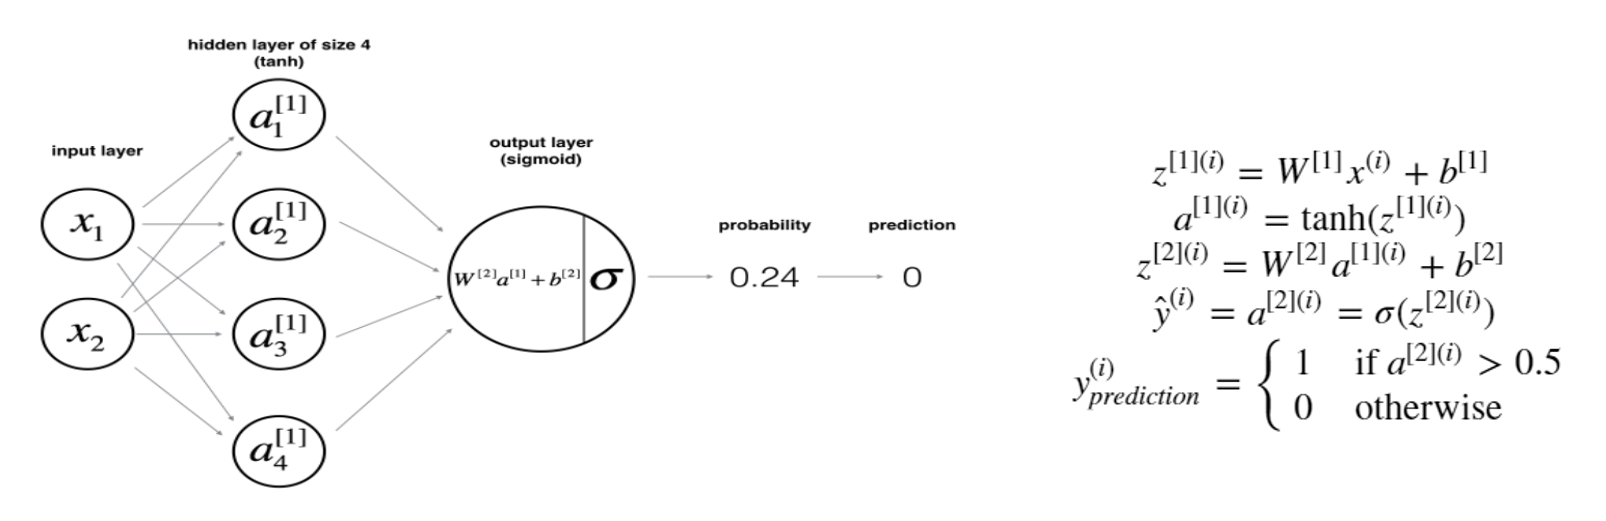

A la izquierda encontramos una representación gráfica de cada neurona y cada capa de la red. A la derecha, se muestran explícitamente las funciones representadas por el diagrama. Tómese un momento para entender la correspondencia entre la notación del diagrama y las ecuaciones.

Note que la última capa solo tiene una neurona, y su función de activación es una sigmoide. Gráficamente, la función sigmoide se ve de la siguiente forma:

<div>
<img src="attachment:sigmoid.png" width=650/>
</div>
    
Esto significa que, por cada descriptor que ingrese a la red, se retornará un número entre 0 y 1. Recuerde que nuestro problema de clasificación es binario. Podríamos interpretar la salida de la red como la probabilidad de que el descriptor corresponda a la clase 1. De esta forma, si la salida es menor a 0.5, la red interpreta que el dato corresponde a la clase 0, y si es mayor, a la clase 1.

## **Ejercicio 2:**
Al inicio de este tutorial se había mencionado que los clasificadores estudiados serían naturalmente generalizables a clasificadores multiclase. A pesar de que en este ejemplo estamos haciendo una clasificación binaria por simplicidad, note que si la última capa retornara un vector de tamaño $n$ en lugar de un solo valor entre 0 y 1, se podría interpretar cada una de las componentes de este vector como la probabilidad de pertenecer a cada una de las $n$ clases en un problema de clasificación multiclase. Bastaría con elegir el componente de este vector con un valor mayor para asignar una clase al dato de entrada. Investigue qué es la función *softmax*, y cómo contribuye a hacer una clasificación multiclase usando una red neuronal.

In [ ]:
def soft_max(X):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
from scipy.special import softmax
from numpy.random import randn
x = randn(5)
assert np.isclose(np.sum(soft_max(x)),1),f'el resultado debería ser la probabilidad de pertenecer a todas las clases, por lo que debe dar suma de 1, no {np.sum(soft_max(x))}'
assert soft_max(x).all()==softmax(x).all(), f'el resultado esperado es {softmax(x)}, el suyo es {soft_max(x)}'

A continuación, crearemos nuestra red neuronal. Para eso, implementaremos una función auxiliar que nos permita extraer algunas dimensiones importantes de la red, y luego otra que inicialice las matrices $W$ con números aleatorios y los vectores $b$ con ceros, esto para todas las capas de la red.

In [ ]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0] 
    
    return (n_x, n_h, n_y)

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


Ahora, implementaremos una función que ejecute todas las operaciones internas de la red. Es decir que reciba una matriz de descriptores, y retorne el vector con la salida de la última función sigmoide. A este proceso de calcular todas las operaciones necesarias para obtener una salida de la red se le conoce como *propagación*.

In [ ]:
# Implementación auxiliar que calcula la función sigmoide punto a punto
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def forward_propagation(X, parameters):
    
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    
    Z1 = np.matmul(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Se almacenan los valores intermedios de la propagación y no solamente el valor de salida de la red
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Previamente habíamos mencionado que podíamos encontrar los parámetros $W$ y $b$ de cada capa para clasificar óptimamente el conjunto de entrenamiento mediante el *descenso de gradiente*. Para esto, al igual que en el caso de los SVM, necesitamos una función de costo. La función de costo debe ser mínima cuando las etiquetas predichas coincidan con las etiquetas, de tal forma que al minimizar dicha función el desempeño del clasificador sea óptimo. Una función que cumple con este atributo para el problema de clasificación binaria es la siguiente:

<div>
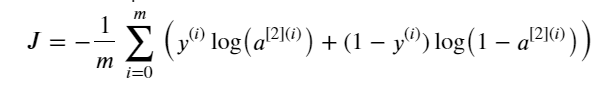
</div>
                                        
Note que si el valor predicho ($a^{[2](i)}$) y el valor de la etiqueta ($y^{(i)}$) son iguales y cercanos a 0 o 1, todo el término dentro de la sumatoria es igual a 0, lo que indicaría una buena clasificación. Por otro lado, si uno de los dos valores es cercano a 0 y el otro a 1, todo el término dentro de la sumatoria sería un valor negativo de gran magnitud, ya que $\scriptsize{\lim_{x \to 0^+} (\log{x}) = - \infty}$, lo que indicaría una mala clasificación. Por lo anterior, al tener un signo negativo afuera de la sumatoria garantizamos que un valor pequeño de la función de costo indica una buena clasificación.

A continuación se presenta una implementación de la función de costo:

In [ ]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs)/m
    cost = float(np.squeeze(cost))
    return cost

El método de descenso de gradiente consiste en actualizar los parámetros en dirección contraria al gradiente de la función de costo. Podemos calcular los gradientes de la función de costo anterior con respecto a cada elemento de los arreglos $W_1, W_2, b_1 \, y \, b_2$ de la siguiente forma:


<div>
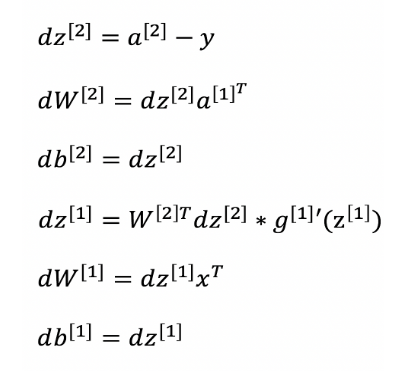
</div>
                                        
Observe que al utilizar la notación de la forma $ dW^{[2]} = \frac{\partial J}{\partial W^{[2]}}$, para calcular estos gradientes es útil conservar los resultados parciales de la propagación. Esa es la razón de que nuestra función `forward_propagation` retorne `cache`.

>**Ejercicio**: Calcule las derivadas a mano y compruebe que coincidan con las expresiones anteriores.

Al proceso de calcular los gradientes de la función de costo con respecto a los parámetros se le conoce como *retropropagación*. A continuación se muestran dos funciones que 1) calculan los gradientes y 2) actualizan los parámetros con base en ellos.

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1, W2 = parameters["W1"], parameters["W2"]
    
    A1, A2 = cache["A1"], cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = np.matmul(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / m
    dZ1 = np.matmul(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.matmul(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    dW1, db1, dW2, db2 = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
    
    # Se actualizan los parámetros en dirección opuesta al gradiente con una tasa de aprendizaje
    # ingresada por parámetro
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Ahora, utilizamos las funciones anteriores para entrenar nuestro modelo. Para esto, consideraremos un total de 10,000 épocas. En cada época, se pasa todo el conjunto de entrenamiento a través de la red, se calcula el gradiente asociado a la función de costo con respecto a todo este conjunto, y se actualizan los parámetros:

In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    # Semilla para garantizar replicabilidad
    np.random.seed(3)
    
    # Se obtienen las dimensiones de interés
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Se inicializan los parámetros de la red con ceros y números aleatorios
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Para cada época:
    for i in range(0, num_iterations):
        
        # 1. Propagación
        A2, cache = forward_propagation(X, parameters)
        # 2. Cálculo de la función de costo
        cost = compute_cost(A2, Y, parameters)
        # 3. Retropropagación 
        grads = backward_propagation(parameters, cache, X, Y)
        # 4. Actualización de parámetros
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        # Se imprime el costo después de 1000 épocas       
        if print_cost and i % 1000 == 0:
            print ("Costo al terminar la iteración %i: %f" %(i, cost))
    # Se retornan los parámetros del modelo entrenado
    return parameters

parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

Para hacer una inferencia se toman los parámetros de la red entrenada y los descriptores de los datos a inferir. Con ellos se hace una sola propagación, y luego se aproxima el valor de salida a 0 o 1. A continuación, se presenta una implementación de una función que hace esta inferencia:

In [ ]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions

La siguiente figura muestra las regiones de clasificación obtenidas por la red neuronal sobre el conjunto de entrenamiento:

In [ ]:
plt.figure(figsize=(15, 8))

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Borde de Decision para capa oculta de tamaño " + str(4))
plt.show()

Note que implementar una red neuronal de ceros tiene varias complicaciones. Una de las más importantes es obtener manualmente las expresiones de los gradientes para distintas profundidades y funciones de activación de la red. Además, hay que ser cuidadoso con el manejo de las dimensiones de entrada y salida de cada capa. Existen librerías que permiten implementar redes neuronales sin tener que desarrollarlas desde cero para sobrellevar estos problemas. Una de ellas es `PyTorch`, la cual fue desarrollada por Facebook (ahora Meta). 

A continuación, se presenta un fragmento de código que permite implementar la misma red neuronal anterior mediante esta librería:

In [ ]:
import sys
!{sys.executable} -m pip install torch
# Se importan los módulos y funciones necesarias
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

# Pytorch maneja su propio formato de arreglo, el cual se llama Tensor.
# Para poder pasar nuestros datos a través de la red transformamos los arreglos de Numpy
# en Tensores de PyTorch

X_tensor = torch.from_numpy(X.T.astype(np.float32))
Y_tensor = torch.from_numpy(Y.T.astype(np.float32))

# Definimos nuestra red neuronal como una clase

class NeuralNetwork(nn.Module):
    def __init__(self):
        
        # Creamos cada capa como instancias de Linear
        super().__init__()
        self.fc1 = nn.Linear(2, 4, bias=True)
        self.fc2 = nn.Linear(4, 1, bias=True)
        
        # Definimos los pasos a seguir en la propagación mediante el método forward
    def forward(self,x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        return x

# Creamos una instancia de nuestra clase de red neuronal
net = NeuralNetwork()

# Creamos una instancia de nuestra función de costo. Consultar la documentación de torch.nn.BCELoss para
# corroborar que coincide con la fórmula presentada anteriormente

criterion = nn.BCELoss()

# Se define el número de épocas
epochs = 10000

# Se crea una instancia de un optimizador que utilizará el método de descenso de gradiente estocástico (SGD)
optm = SGD(net.parameters(), lr = 1.2)

# Creamos una función de entrenamiento que recibe como parámetros nuestro conjunto de entrenamiento, sus etiquetas
# el optimizador y la función de costo

def train(model, x, y, optimizer, criterion):
    # Se reinician los gradientes del modelo
    model.zero_grad()
    # Se hace la propagación
    output = model(x)
    # Se calcula el costo a partir de el resultado de la propagación y las etiquetas
    loss = criterion(output,y)
    # Se hace la retropropagación
    loss.backward()
    # Se actualizan los valores de los parámetros del modelo según el optimizador.
    optimizer.step()

    return loss, output

# Entrenamos el modelo por el número de épocas elegidas y se retorna el costo cada 1000 épocas
for i in range(epochs):
    correct = 0
    loss, predictions = train(net, X_tensor, Y_tensor, optm, criterion)
    if i % 1000 == 0:
            print ("Costo al terminar la iteración %i: %f" %(i, loss))
            

Para obtener la salida de la propagación se pasa el Tensor a través de la red de la siguiente forma: `net(X)`. Sin embargo, para transformar los Tensores en arreglos de Numpy, dado el caso de que se quieran hacer cálculos que no involucren a la librería `PyTorch`, se deben seguir unos pasos adicionales. Esto es útil a la hora de hacer inferencias:

In [ ]:
# Se obtiene el Tensor de probabilidades predichas
output_tensor = net(X_tensor)

# detach() permite extraer valores de Tensores involucrados en el cálculo de gradientes y numpy() los
# transforma en arreglos de numpy
output = output_tensor.detach().numpy()

# Se aproximan las probabilidades para obtener las etiquetas predichas
pred_labels = (output > 0.5).astype(int)

# Se calcula la exactituda del clasificador
correct = np.sum(pred_labels == Y.T)
total = len(Y.T)
print("La exactitud del clasificador es: ", str(correct) + " / " + str(total) + " = " + str(correct / total))

# Créditos:

Para la implementación de la red neuronal de ceros se adaptaron unos fragmentos de código e imágenes del Notebook *Planar data classification with one hidden layer* del MOOC *Neural Networks and Deep Learning*. Este curso hace parte de la especialización de *Deep Learning* ofrecida por DeepLearning.ai disponible en Coursera.

### Realizado por:
Danniel Moreno
### Supervisado por:
Felipe Escallón Páez - Jose Miguel Abril Nova

2022